Will Keesler

CS 760

Spring 2023 Homework 3

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

## Part 1

### Question 2

#### a.

In [2]:
df = pd.DataFrame({
    "X_1": [0,2,0,0,-1,1],
    "X_2": [3,0,1,1,0,1],
    "X_3": [0,0,3,2,1,1],
    "Y": ["Red", "Red", "Red", "Green", "Green", "Red"],
})
df.head(10)

,X_1,X_2,X_3,Y
0,0,3,0,Red
1,2,0,0,Red
2,0,1,3,Red
3,0,1,2,Green
4,-1,0,1,Green
5,1,1,1,Red


In [3]:
t = np.array([0,0,0])
df.assign(d_E=df.apply(lambda x: math.sqrt(sum(np.square(x[0:3] - t))), axis=1))

,X_1,X_2,X_3,Y,d_E
0,0,3,0,Red,3.000000
1,2,0,0,Red,2.000000
2,0,1,3,Red,3.162278
3,0,1,2,Green,2.236068
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051


### Question 3

#### a.

In [4]:
E = 0.1*0.95 - 0.1*0.05 + 0.05**2 + 0.1*0.05
print(f"{E:2.4f}")

0.0975


#### b.

#### c.

#### d.

#### e.

### Question 4

In [5]:
TP = 8
TN = 974
FP = 16
FN = 2

#### a.

In [6]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
print(f"Accuracy = {accuracy}")

Accuracy = 0.982


#### b.

In [7]:
precision = TP/(TP+FP)
print(f"Precision = {precision}")

Precision = 0.3333333333333333


#### c.

In [8]:
recall = TP/(TP+FN)
print(f"Recall = {recall}")

Recall = 0.8


### Question 5

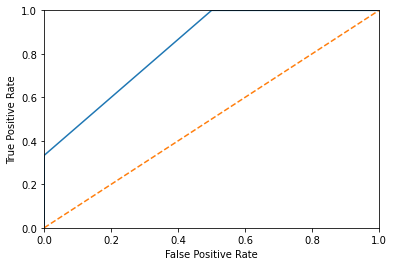

In [9]:
tp = [0, 2/6, 4/6, 6/6, 6/6]
fp = [0, 0/4, 1/4, 2/4, 4/4]
plt.plot(fp, tp)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('q1_5_roc.png')

### Question 6

#### b.

In [10]:
theta_0 = np.array([0,0,0])
x = np.array([1,3,2])
y = 1
eta = 0.1
theta_1 = theta_0 - eta * (1/(1+math.exp(-np.dot(theta_0, x))) - y) * x
print(theta_1)

[0.05 0.15 0.1 ]


## Part 2

### Question 1

In [11]:
D2z_df = pd.read_csv("data/D2z.txt", header=None, sep=" ")
train_X = D2z_df[[0, 1]]
train_y = D2z_df[[2]].to_numpy(dtype=bool).flatten()
knn_clf = KNeighborsClassifier(n_neighbors=1, p=2)
knn_clf.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=1)

In [12]:
test_1, test_2 = np.meshgrid(
    np.linspace(-2, 2, num=41, endpoint=True),
    np.linspace(-2, 2, num=41, endpoint=True),
)
test_1 = test_1.flatten()
test_2 = test_2.flatten()
test_X = np.array([test_1, test_2]).transpose()
y_hat = knn_clf.predict(test_X)

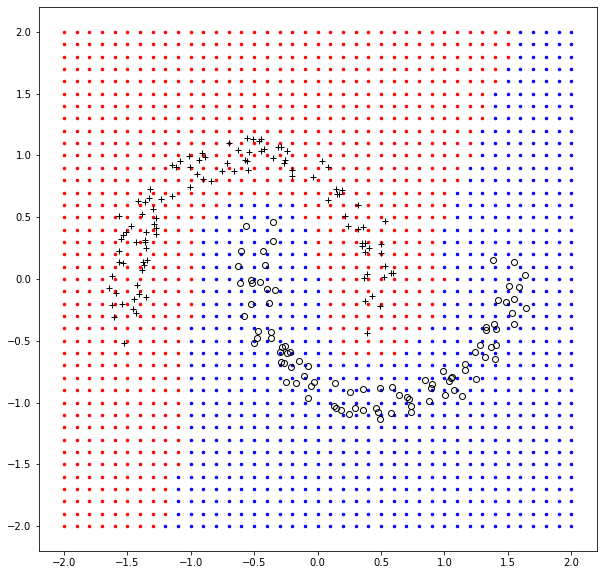

In [13]:
fig = plt.figure(figsize=(10, 10))
plt.plot(test_1[y_hat], test_2[y_hat], color='red', marker='.', markersize=5, linestyle='none')
plt.plot(test_1[~y_hat], test_2[~y_hat], color='blue', marker='.', markersize=5, linestyle='none')
plt.plot(D2z_df[D2z_df[2] == 1][0], D2z_df[D2z_df[2] == 1][1], color='black', linestyle='none', marker='+')
plt.plot(D2z_df[D2z_df[2] == 0][0], D2z_df[D2z_df[2] == 0][1], color='black', fillstyle='none', linestyle='none', marker='o')
fig.savefig('p2_q1_d2z.png', dpi=300)

### Question 2

In [14]:
emails_df = pd.read_csv("data/emails.csv")
emails_X = emails_df.drop(columns=["Email No.", "Prediction"])
emails_y = emails_df["Prediction"]

In [15]:
def five_fold_cv(clf, X, y):
    num_folds = 5
    slice_size = 1000
    accuracy = np.zeros(num_folds)
    precision = np.zeros(num_folds)
    recall = np.zeros(num_folds)
    for fold in range(0, num_folds):
        start = fold * slice_size
        end = (fold + 1) * slice_size
        fold_slice = np.arange(start, end, step=1)
        test_X = X.iloc[fold_slice]
        test_y = y.iloc[fold_slice].to_numpy(dtype=bool).flatten()
        train_X = X.iloc[~X.index.isin(fold_slice)]
        train_y = y.iloc[~X.index.isin(fold_slice)].to_numpy(dtype=bool).flatten()
        clf.fit(train_X, train_y)
        y_hat = clf.predict(test_X)
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        for predicted, actual in zip(y_hat, test_y):
            if actual and predicted is actual:
                tp += 1
            elif actual:
                fn += 1
            elif predicted is actual:
                tn += 1
            else:
                fp += 1
        accuracy[fold] = (tp + tn)/(tp + tn + fp + fn)
        precision[fold] = tp/(tp + fp)
        recall[fold] = tp/(tp + fn)

    return pd.DataFrame({
        "Fold": np.arange(1, num_folds + 1, dtype=int),
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
    })

In [16]:
res_df = five_fold_cv(knn_clf, emails_X, emails_y)

In [17]:
res_df.head()

,Fold,Accuracy,Precision,Recall
0,1,0.825,0.654494,0.817544
1,2,0.853,0.685714,0.866426
2,3,0.862,0.721212,0.838028
3,4,0.851,0.716418,0.816327
4,5,0.775,0.605744,0.758170


### Question 3

In [18]:
class LogisticRegression:

    def __init__(self):
        self.thetas = None

    def fit(self, X, y, eta=0.1, tol=0.00001, max_iterations=1000):
        X = np.array(X)
        y = np.array(y)
        n, p = np.shape(X)
        eta = eta/n
        thetas = np.zeros(p)
        for iteration in range(0, max_iterations):
            grad_l = np.zeros(p)
            theta_X = -np.matmul(thetas, X.transpose())
            for i in range(0, n):
                grad_l += (1/(1+np.exp(theta_X[i])) - y[i]) * X[i]
            next_thetas = thetas - eta * grad_l
            diff = np.sqrt(np.sum(np.square(next_thetas - thetas)))/np.sqrt(np.sum(np.square(next_thetas)))
            thetas = next_thetas
            if diff < tol:
                break

        self.thetas = thetas
        return self.thetas

    def predict(self, X):
        X = np.array(X)
        n, p = np.shape(X)
        y = np.zeros(n)
        for i in range(0, n):
            y[i] = 1/(1+np.exp(-np.dot(self.thetas, X[i])))
        return np.array([y_i > 0.5 for y_i in y], dtype=bool)

    def predict_proba(self, X):
        X = np.array(X)
        n, p = np.shape(X)
        y = np.zeros(n)
        for i in range(0, n):
            y[i] = 1/(1+np.exp(-np.dot(self.thetas, X[i])))
        return [(1 - p_true, p_true) for p_true in y]

In [19]:
lg_clf = LogisticRegression()
res_df = five_fold_cv(lg_clf, emails_X, emails_y)
res_df.head()

C:\Users\kaise\AppData\Local\Temp\ipykernel_12360\1218572536.py:16: RuntimeWarning: overflow encountered in exp
  grad_l += (1/(1+np.exp(theta_X[i])) - y[i]) * X[i]
C:\Users\kaise\AppData\Local\Temp\ipykernel_12360\1218572536.py:31: RuntimeWarning: overflow encountered in exp
  y[i] = 1/(1+np.exp(-np.dot(self.thetas, X[i])))


,Fold,Accuracy,Precision,Recall
0,1,0.909,0.891129,0.775439
1,2,0.854,0.901840,0.530686
2,3,0.889,0.821561,0.778169
3,4,0.843,0.663484,0.945578
4,5,0.849,0.785978,0.696078


### Question 4

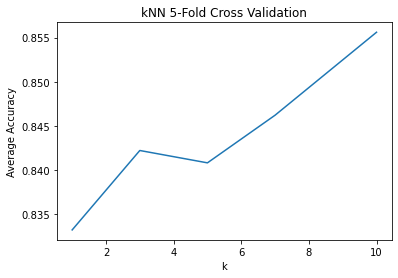

In [20]:
ks = [1, 3, 5, 7, 10]
accuracy = np.zeros(len(ks))
for n, k in enumerate(ks):
    knn_clf = KNeighborsClassifier(n_neighbors=k, p=2)
    res_df = five_fold_cv(knn_clf, emails_X, emails_y)
    accuracy[n] = res_df["Accuracy"].mean()
plt.plot(ks, accuracy)
plt.xlabel("k")
plt.ylabel("Average Accuracy")
plt.title("kNN 5-Fold Cross Validation")
plt.savefig("p2_q4.png")

### Question 5

C:\Users\kaise\AppData\Local\Temp\ipykernel_12360\1218572536.py:16: RuntimeWarning: overflow encountered in exp
  grad_l += (1/(1+np.exp(theta_X[i])) - y[i]) * X[i]
C:\Users\kaise\AppData\Local\Temp\ipykernel_12360\1218572536.py:39: RuntimeWarning: overflow encountered in exp
  y[i] = 1/(1+np.exp(-np.dot(self.thetas, X[i])))


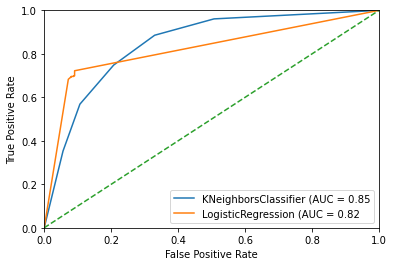

In [21]:
def roc_auc(clf, X, y):
    start = 4000
    end = 5000
    fold_slice = np.arange(start, end, step=1)
    test_X = X.iloc[fold_slice]
    test_y = y.iloc[fold_slice].to_numpy(dtype=bool).flatten()
    train_X = X.iloc[~X.index.isin(fold_slice)]
    train_y = y.iloc[~X.index.isin(fold_slice)].to_numpy(dtype=bool).flatten()
    clf.fit(train_X, train_y)
    p_y_hat = clf.predict_proba(test_X)
    thresholds = np.linspace(0, 1.01, num=101, endpoint=True)
    tpr = np.zeros(len(thresholds))
    fpr = np.zeros(len(thresholds))
    for n, t in enumerate(thresholds):
        y_hat = np.array([p_true >= t for p_false, p_true in p_y_hat])
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        for predicted, actual in zip(y_hat, test_y):
            if actual and predicted is actual:
                tp += 1
            elif actual:
                fn += 1
            elif predicted is actual:
                tn += 1
            else:
                fp += 1
        tpr[n] = tp/(tp+fn)
        fpr[n] = fp/(tn+fp)

    auc = 0
    for n in range(0, len(thresholds)-1):
        auc += (fpr[n] - fpr[n+1])*(tpr[n+1] + tpr[n])/2
    return tpr, fpr, auc

X = emails_X
y = emails_y
knn_clf = KNeighborsClassifier(n_neighbors=5, p=2)
knn_tpr, knn_fpr, knn_auc = roc_auc(knn_clf, X, y)
lg_clf = LogisticRegression()
lg_tpr, lg_fpr, lg_auc = roc_auc(lg_clf, X, y)
plt.plot(knn_fpr, knn_tpr, label=f"KNeighborsClassifier (AUC = {knn_auc:2.2f}")
plt.plot(lg_fpr, lg_tpr, label=f"LogisticRegression (AUC = {lg_auc:2.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('q2_5_roc.png')